In [121]:
# Importing necessary libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# Assignments
C_Root = '/content/drive/MyDrive/Titanic'

In [107]:
# Getting the data
data_train = pd.read_csv(f'{C_Root}/train.csv')
data_test = pd.read_csv(f'{C_Root}/test.csv')

In [24]:
print(f"Training Data Length : {len(data_train)}")
print(f"Test Data Length     : {len(data_test)}")

Training Set Length : 891
Test Set Length     : 418


In [35]:
print("Training Dataset:")
for col in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
  print(data_train[col].value_counts())
  sum = data_train[col].value_counts().sum()
  print(f'Values : {sum:03d} | Total : {len(data_train):03d} | Null-Values : {len(data_train)-sum:03d}')
  print('-' * 50)

Training Dataset:
3    491
1    216
2    184
Name: Pclass, dtype: int64
Values : 891 | Total : 891 | Null-Values : 000
--------------------------------------------------
male      577
female    314
Name: Sex, dtype: int64
Values : 891 | Total : 891 | Null-Values : 000
--------------------------------------------------
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
Values : 891 | Total : 891 | Null-Values : 000
--------------------------------------------------
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
Values : 891 | Total : 891 | Null-Values : 000
--------------------------------------------------
S    644
C    168
Q     77
Name: Embarked, dtype: int64
Values : 889 | Total : 891 | Null-Values : 002
--------------------------------------------------
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     

In [26]:
print("Test Dataset:")
for col in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
  print(data_test[col].value_counts())
  sum = data_test[col].value_counts().sum()
  print(f'Values : {sum:03d} | Total : {len(data_test):03d} | Null-Values : {len(data_test)-sum:03d}')
  print('-' * 50)

Test Dataset:
3    218
1    107
2     93
Name: Pclass, dtype: int64
Values : 418 | Total : 418 | Null-Values : 000
--------------------------------------------------
male      266
female    152
Name: Sex, dtype: int64
Values : 418 | Total : 418 | Null-Values : 000
--------------------------------------------------
0    283
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64
Values : 418 | Total : 418 | Null-Values : 000
--------------------------------------------------
0    324
1     52
2     33
3      3
9      2
4      2
6      1
5      1
Name: Parch, dtype: int64
Values : 418 | Total : 418 | Null-Values : 000
--------------------------------------------------
S    270
C    102
Q     46
Name: Embarked, dtype: int64
Values : 418 | Total : 418 | Null-Values : 000
--------------------------------------------------


In [140]:
data_train.Age.fillna(value = data_train.Age.mean(skipna = True), inplace = True)
data_test.Age.fillna(value = data_test.Age.mean(skipna = True), inplace = True)

In [141]:
def get_title(x):
  x = re.findall(r'[,\s]{1,}[A-Za-z]{1,}[.]{1,}', x)[0]
  x = re.sub(r'[^A-Za-z]', '', x)
  return x
data_train['Title'] = data_train['Name'].apply(get_title)
data_test['Title'] = data_test['Name'].apply(get_title)
print(data_train['Title'].value_counts())
print(data_test['Title'].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Mme           1
Jonkheer      1
Lady          1
Countess      1
Don           1
Capt          1
Sir           1
Ms            1
Name: Title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64


In [137]:
def plot_fare(df):
  plt.figure(figsize = (5, 5))
  sns.boxplot(y = df.Fare)
  plt.show()

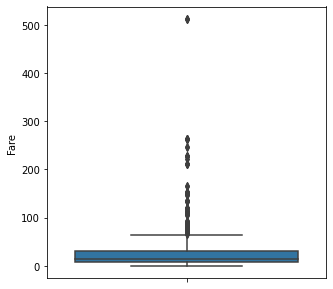

In [138]:
plot_fare(data_train)

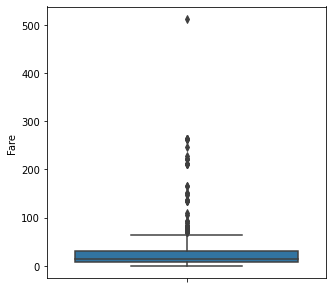

In [139]:
plot_fare(data_test)

In [147]:
bins = [(0.0, 25.0), (25.1, 50.0), (50.1, 550.0)]
print("Train")
for (lower, upper) in bins:
  cnt = len(data_train[(data_train.Fare >= lower) & (data_train.Fare <= upper)])
  print(f"{lower} to {upper} = {cnt} ")
print("Test")
for (lower, upper) in bins:
  cnt = len(data_test[(data_test.Fare >= lower) & (data_test.Fare <= upper)])
  print(f"{lower} to {upper} = {cnt} ")

Train
0.0 to 25.0 = 557 
25.1 to 50.0 = 174 
50.1 to 550.0 = 160 
Test
0.0 to 25.0 = 264 
25.1 to 50.0 = 73 
50.1 to 550.0 = 80 


In [148]:
data_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


## Things to do


1.   PClass_1, PClass_2, PClass_3 <- PClass   [Higher Class Passengers will probably be evacuated first]
2.   Male, Female <- Sex   [Females will be evacuated first in any disaster]
3.   Sib_0, Sib_1, Sib_2plus <- SibSp
4.   Parch_0, Parch_1, Parch_2plus <- Parch
5.   Emb_S, Emb_C, Emb_Q <- Embarked
6.   Fare_0to25, Fare_25to50, Fare_50plus <- Fare [Passengers paying higher fare may probably be saved first]
7.   Adult, Child <- Name [Children will be evacuated first in any disaster]
8.   Royalty, ServicePersonnell, CommonPeople <- Name [Royalty will be evacuated first and ServicePersonnel can choose to stay behind] 

